<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Ciencia-de-Datos-en-Ciencias-Economicas-con-Python/blob/master/Datareader_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pandas Datareader**


## **Obtención de datos de Bitcoin**

### Importando las librerías necesarias

In [ ]:
import pandas as pd
import pandas_datareader as data
from pandas.util.testing import assert_frame_equal
import datetime as dt
import matplotlib.pyplot as plot

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Se activa la librería pandas_datareader para obtener datos externos, matplotlib para hacer algunos gráficos, y pandas para darle formato a los datos en forma de tabla y poder agregar las variables necesarias (columnas).

### Obteniendo datos con DataReader

In [ ]:
BTC = data.DataReader("BTC-USD", start='2016-01-01', end='2020-05-01', data_source='yahoo')

Se activa datareader para acceder a los datos de la cotización de las acciones de YPF para el mes de enero del 2020, y la fuente de datos a la que se accede para extraer los datos es yahoo.

### Creando el DataFrame y realizando limpieza y transformación de datos

In [ ]:
btc = pd.DataFrame(BTC)

A los datos guardados en la variable YPF, se les da forma de tabla y se los guarda en otra variable denominada ypf. El comando utilizado es pd.Dataframe(), que es de pandas.

In [ ]:
btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,436.246002,427.515015,430.721008,434.334015,36278900,434.334015
2016-01-02,436.062012,431.869995,434.622009,433.437988,30096600,433.437988
2016-01-03,433.743011,424.705994,433.578003,430.010986,39633800,430.010986
2016-01-04,434.516998,429.084015,430.061005,433.091003,38477500,433.091003
2016-01-05,434.182007,429.675995,433.069000,431.959991,34522600,431.959991


Para visualizar los primeros cinco registros de la tabla y todas las variables (columnas), se utiliza head(). La sintaxis sería ypf.head() para que muestre los datos contenidos en la tabla generada en ypf. Observar que las variables son las siguientes:
+ High: representa el valor más alto de cotización para esa fecha.
+ Low: representa el valor más bajo de cotización para esa fecha.
+ Open: representa el valor de apertura para esa fecha.
+ Close: representa el valor de cierre para esa fecha.


In [ ]:
btc.shape

(1584, 6)

Para saber cuantas observaciones tiene el conjunto de datos se utiliza el comando shape, y el resultado indica, en primer lugar 21 observaciones y seis variables (columnas). A primera vista pareciera que no estarían las cotizaciones de los días sábados y domingos. Con unos simples comandos se puede constatar tal apreciación.

In [ ]:
Date = btc.index.values

Se genera la variable Date (Fecha), con los valores consignados como nombre de fila.

In [ ]:
btc.insert(0,column='Date',value=Date)

Luego se inserta esos valores como primera columna, el valor de los datos es la variable generada denominada Date (Fecha).

In [ ]:
print(btc)

                 Date         High  ...       Volume    Adj Close
Date                                ...                          
2016-01-01 2016-01-01   436.246002  ...     36278900   434.334015
2016-01-02 2016-01-02   436.062012  ...     30096600   433.437988
2016-01-03 2016-01-03   433.743011  ...     39633800   430.010986
2016-01-04 2016-01-04   434.516998  ...     38477500   433.091003
2016-01-05 2016-01-05   434.182007  ...     34522600   431.959991
...               ...          ...  ...          ...          ...
2020-04-27 2020-04-27  7814.527344  ...  33187959920  7807.058594
2020-04-28 2020-04-28  8871.753906  ...  60201052202  8801.038086
2020-04-29 2020-04-29  9440.650391  ...  66964629541  8658.553711
2020-04-30 2020-04-30  9048.023438  ...  44068389996  8864.766602
2020-05-01 2020-05-01  9007.187500  ...  40134388683  8988.596680

[1584 rows x 7 columns]


Para visualizar la tabla con la columna generada se utiliza print. Pero todavía no vemos con claridad si los días sábados y domingos es la razón por la cual tenemos en el conjunto de datos, 21 observaciones. Por lo tanto vamos a generar la variable Day (Día).

In [ ]:
btc.reset_index(drop=True, inplace=True)

Ahora eliminamos los valores del index, que serían los nombres de las celdas

In [ ]:
print(btc)

           Date         High  ...       Volume    Adj Close
0    2016-01-01   436.246002  ...     36278900   434.334015
1    2016-01-02   436.062012  ...     30096600   433.437988
2    2016-01-03   433.743011  ...     39633800   430.010986
3    2016-01-04   434.516998  ...     38477500   433.091003
4    2016-01-05   434.182007  ...     34522600   431.959991
...         ...          ...  ...          ...          ...
1579 2020-04-27  7814.527344  ...  33187959920  7807.058594
1580 2020-04-28  8871.753906  ...  60201052202  8801.038086
1581 2020-04-29  9440.650391  ...  66964629541  8658.553711
1582 2020-04-30  9048.023438  ...  44068389996  8864.766602
1583 2020-05-01  9007.187500  ...  40134388683  8988.596680

[1584 rows x 7 columns]


In [ ]:
btc['Day'] = pd.DatetimeIndex(btc['Date']).day_name()

Vamos a crear la variable Day (Día) agregando al conjunto de datos con el comando pd.DateTimeIndex() el nombre del día.

In [ ]:
print(btc)

           Date         High          Low  ...       Volume    Adj Close        Day
0    2016-01-01   436.246002   427.515015  ...     36278900   434.334015     Friday
1    2016-01-02   436.062012   431.869995  ...     30096600   433.437988   Saturday
2    2016-01-03   433.743011   424.705994  ...     39633800   430.010986     Sunday
3    2016-01-04   434.516998   429.084015  ...     38477500   433.091003     Monday
4    2016-01-05   434.182007   429.675995  ...     34522600   431.959991    Tuesday
...         ...          ...          ...  ...          ...          ...        ...
1579 2020-04-27  7814.527344  7730.806641  ...  33187959920  7807.058594     Monday
1580 2020-04-28  8871.753906  7786.049316  ...  60201052202  8801.038086    Tuesday
1581 2020-04-29  9440.650391  8533.255859  ...  66964629541  8658.553711  Wednesday
1582 2020-04-30  9048.023438  8667.763672  ...  44068389996  8864.766602   Thursday
1583 2020-05-01  9007.187500  8811.366211  ...  40134388683  8988.596680    

Notese que la tabla tiene 217 filas (observaciones) por 8 columnas (variables) ya que se agregaron dos variables al conjunto de datos inicial, la variable Date y la variable Day, y nuestra apreciación era la correcta, no se encuentran los días sábados y domingos.
Ahora bien, para nuestros cálculos posteriores  necesitamos la libreria Numpy.

In [ ]:
import numpy as np

Entonces para eliminar las columnas Volume y Adj Close, utilizamos el comando drop

In [ ]:
btc.rename(columns={'Adj Close':'Adj_Close'}, inplace=True)

In [ ]:
print(btc)

           Date         High          Low  ...       Volume    Adj_Close        Day
0    2016-01-01   436.246002   427.515015  ...     36278900   434.334015     Friday
1    2016-01-02   436.062012   431.869995  ...     30096600   433.437988   Saturday
2    2016-01-03   433.743011   424.705994  ...     39633800   430.010986     Sunday
3    2016-01-04   434.516998   429.084015  ...     38477500   433.091003     Monday
4    2016-01-05   434.182007   429.675995  ...     34522600   431.959991    Tuesday
...         ...          ...          ...  ...          ...          ...        ...
1579 2020-04-27  7814.527344  7730.806641  ...  33187959920  7807.058594     Monday
1580 2020-04-28  8871.753906  7786.049316  ...  60201052202  8801.038086    Tuesday
1581 2020-04-29  9440.650391  8533.255859  ...  66964629541  8658.553711  Wednesday
1582 2020-04-30  9048.023438  8667.763672  ...  44068389996  8864.766602   Thursday
1583 2020-05-01  9007.187500  8811.366211  ...  40134388683  8988.596680    

In [ ]:
btc['Return'] = btc.Adj_Close.pct_change()

In [ ]:
print(btc)

           Date         High          Low  ...    Adj_Close        Day    Return
0    2016-01-01   436.246002   427.515015  ...   434.334015     Friday       NaN
1    2016-01-02   436.062012   431.869995  ...   433.437988   Saturday -0.002063
2    2016-01-03   433.743011   424.705994  ...   430.010986     Sunday -0.007907
3    2016-01-04   434.516998   429.084015  ...   433.091003     Monday  0.007163
4    2016-01-05   434.182007   429.675995  ...   431.959991    Tuesday -0.002611
...         ...          ...          ...  ...          ...        ...       ...
1579 2020-04-27  7814.527344  7730.806641  ...  7807.058594     Monday  0.001470
1580 2020-04-28  8871.753906  7786.049316  ...  8801.038086    Tuesday  0.127318
1581 2020-04-29  9440.650391  8533.255859  ...  8658.553711  Wednesday -0.016189
1582 2020-04-30  9048.023438  8667.763672  ...  8864.766602   Thursday  0.023816
1583 2020-05-01  9007.187500  8811.366211  ...  8988.596680     Friday  0.013969

[1584 rows x 9 columns]


## **Algunos Gráficos Básicos**

### Dataset a graficar

In [ ]:
print(btc)

           Date         High          Low  ...    Adj_Close        Day    Return
0    2016-01-01   436.246002   427.515015  ...   434.334015     Friday       NaN
1    2016-01-02   436.062012   431.869995  ...   433.437988   Saturday -0.002063
2    2016-01-03   433.743011   424.705994  ...   430.010986     Sunday -0.007907
3    2016-01-04   434.516998   429.084015  ...   433.091003     Monday  0.007163
4    2016-01-05   434.182007   429.675995  ...   431.959991    Tuesday -0.002611
...         ...          ...          ...  ...          ...        ...       ...
1579 2020-04-27  7814.527344  7730.806641  ...  7807.058594     Monday  0.001470
1580 2020-04-28  8871.753906  7786.049316  ...  8801.038086    Tuesday  0.127318
1581 2020-04-29  9440.650391  8533.255859  ...  8658.553711  Wednesday -0.016189
1582 2020-04-30  9048.023438  8667.763672  ...  8864.766602   Thursday  0.023816
1583 2020-05-01  9007.187500  8811.366211  ...  8988.596680     Friday  0.013969

[1584 rows x 9 columns]


### Configurando para graficar, y verificando estilos de gráficos disponibles

In [ ]:
import matplotlib as plot
import matplotlib.pyplot as plot


In [ ]:
print(plot.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Gráfico Lineal

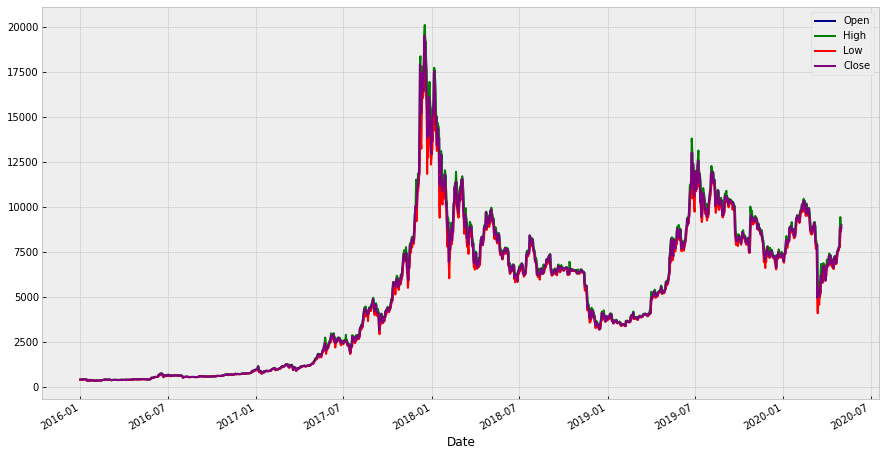

In [ ]:
plot.style.use('bmh')
btc.plot('Date',['Open','High','Low','Close'], kind='line', figsize=(15,8), color=['darkblue','green','red','purple'])

### Gráfico Histograma

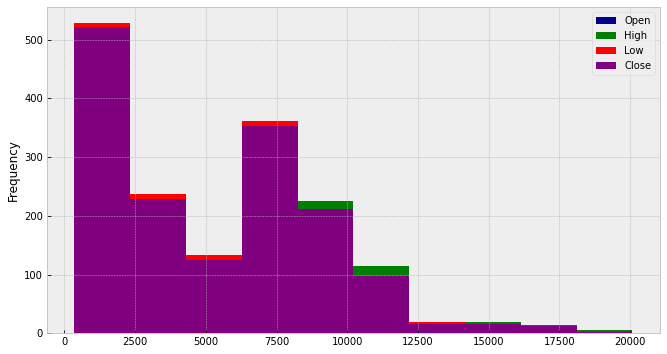

In [ ]:
plot.style.use('bmh')
btc.plot('Date', ['Open','High','Low','Close'], kind='hist', figsize=(11,6), color=['darkblue','green','red','purple'])

### Gráfico de Caja

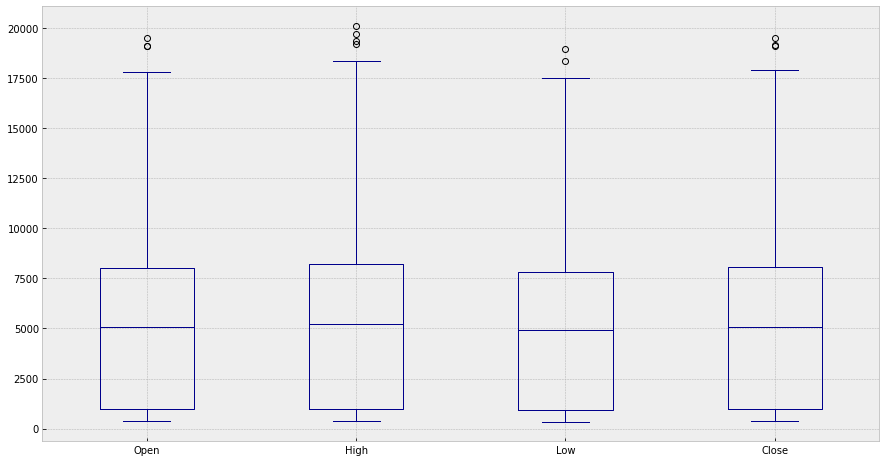

In [ ]:
plot.style.use('bmh')
btc.plot('Date',['Open','High','Low','Close'], kind='box', figsize=(15,8), color='darkblue')

### Gráfico KDE

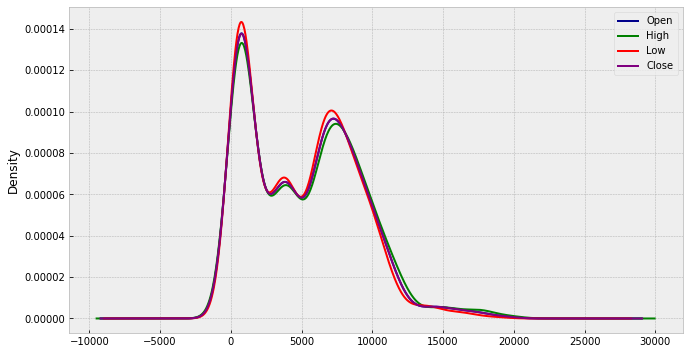

In [ ]:
plot.style.use('bmh')
btc.plot('Date',['Open','High','Low','Close'], kind='kde', figsize=(11,6), color=['darkblue','green','red','purple'])

### Gráfico de Áreas

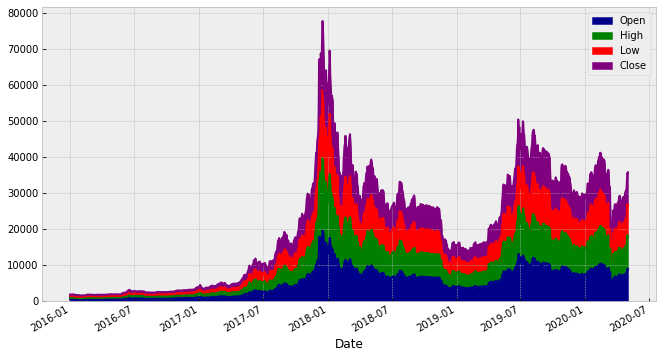

In [ ]:
plot.style.use('bmh')
btc.plot('Date',['Open','High','Low','Close'], kind='area', figsize=(11,6), color=['darkblue','green','red','purple'])

### Serie de Tiempo

[Text(0, 0.5, 'Retorno')]

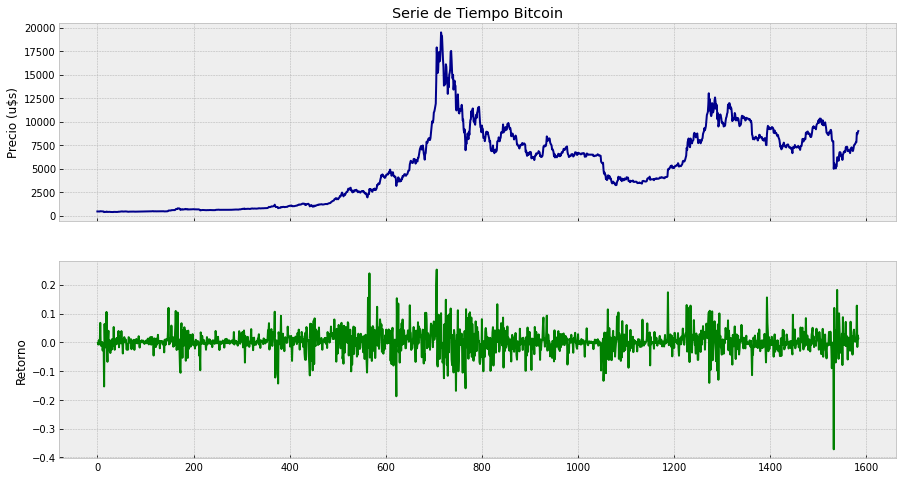

In [ ]:
plot.style.use('bmh')
fig, ax = plot.subplots(2, 1, figsize=(15,8), sharex=True)

btc.Adj_Close.plot(ax=ax[0], color=['darkblue'])
ax[0].set(title = 'Serie de Tiempo Bitcoin', ylabel = 'Precio (u$s)')
    
btc.Return.plot(ax=ax[1], color=['green'])
ax[1].set(ylabel = 'Retorno')

## **Datos atípicos**

In [ ]:
df_rolling = btc[['Return']].rolling(window=21).agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()

In [ ]:
df_outliers = btc.join(df_rolling)

In [ ]:
def indentify_outliers(row, n_sigmas=3):
    x = row['Return']
    mu = row['mean']
    sigma = row['std']
    
    if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
        return 1
    else:
        return 0

In [ ]:
df_outliers['outlier'] = df_outliers.apply(indentify_outliers, axis=1)                                                                                                       
outliers = df_outliers.loc[df_outliers['outlier'] == 1, ['Return']]

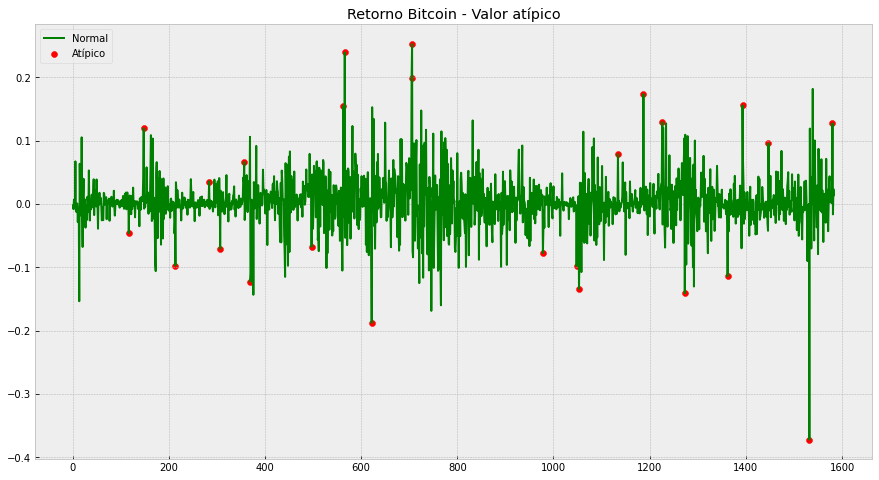

In [ ]:
plot.style.use('bmh')
fig, ax = plot.subplots(figsize=(15,8))

ax.plot(df_outliers.index, df_outliers.Return, color='green', label='Normal')
ax.scatter(outliers.index, outliers.Return, color='red', label='Atípico')
ax.set_title("Retorno Bitcoin - Valor atípico")
ax.legend(loc='upper left')

## **Otros cálculos**

### Importando las librerías necesarias

In [ ]:
import seaborn as sns 
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

### Estadistica descriptiva


In [ ]:
print(btc)

           Date         High          Low  ...    Adj_Close        Day    Return
0    2016-01-01   436.246002   427.515015  ...   434.334015     Friday       NaN
1    2016-01-02   436.062012   431.869995  ...   433.437988   Saturday -0.002063
2    2016-01-03   433.743011   424.705994  ...   430.010986     Sunday -0.007907
3    2016-01-04   434.516998   429.084015  ...   433.091003     Monday  0.007163
4    2016-01-05   434.182007   429.675995  ...   431.959991    Tuesday -0.002611
...         ...          ...          ...  ...          ...        ...       ...
1579 2020-04-27  7814.527344  7730.806641  ...  7807.058594     Monday  0.001470
1580 2020-04-28  8871.753906  7786.049316  ...  8801.038086    Tuesday  0.127318
1581 2020-04-29  9440.650391  8533.255859  ...  8658.553711  Wednesday -0.016189
1582 2020-04-30  9048.023438  8667.763672  ...  8864.766602   Thursday  0.023816
1583 2020-05-01  9007.187500  8811.366211  ...  8988.596680     Friday  0.013969

[1584 rows x 9 columns]


In [ ]:
btc.describe()

,High,Low,Open,Close,Volume,Adj_Close,Return
count,1584.000000,1584.000000,1584.000000,1584.000000,1.584000e+03,1584.000000,1583.000000
mean,5258.694669,4973.955256,5121.251427,5126.497484,8.691945e+09,5126.497484,0.002753
std,4032.227874,3746.977502,3902.234660,3901.679117,1.139719e+10,3901.679117,0.040679
min,374.950012,354.914001,365.072998,364.330994,2.851400e+07,364.330994,-0.371695
25%,1004.340012,953.975479,976.328735,985.485764,1.868252e+08,985.485764,-0.012013
50%,5237.065918,4937.672119,5061.997314,5065.798096,4.275625e+09,5065.798096,0.001993
75%,8219.481934,7838.148071,8041.255493,8044.845093,1.369261e+10,8044.845093,0.017936
max,20089.000000,18974.099609,19475.800781,19497.400391,7.415677e+10,19497.400391,0.252472


In [ ]:
btc.Return.describe()

count    1583.000000
mean        0.002753
std         0.040679
min        -0.371695
25%        -0.012013
50%         0.001993
75%         0.017936
max         0.252472
Name: Return, dtype: float64

In [ ]:
rango = btc.Return.max() - btc.Return.min()
rango

0.6241670798774889

In [ ]:
media = btc.Return.mean()
media

0.0027526035849174935

In [ ]:
desviacion = btc.Return.std()
desviacion

0.040679365437748125

In [ ]:
norm_pdf = scs.norm.pdf(rango, loc=media, scale=desviacion) 

Text(0.5, 1.0, 'Q-Q plot Cierre Ajustado')

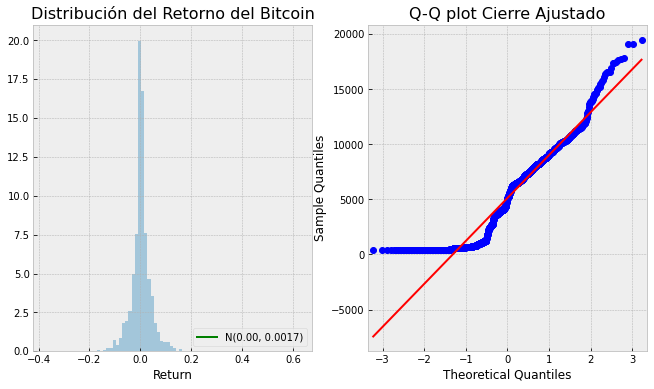

In [ ]:
plot.style.use('bmh')
fig, ax = plot.subplots(1, 2, figsize=(11, 6))

# Histograma
sns.distplot(btc.Return, kde=False, norm_hist=True, ax=ax[0]) 
ax[0].set_title('Distribución del Retorno del Bitcoin', fontsize=16) 
ax[0].plot(rango, norm_pdf, 'g', lw=2, label=f'N({media:.2f}, {desviacion**2:.4f})')
ax[0].legend(loc='lower right');

# Q-Q plot
qq = sm.qqplot(btc.Adj_Close.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot Cierre Ajustado', fontsize = 16)


In [ ]:
N_LAGS = 50
Nivel = 0.05

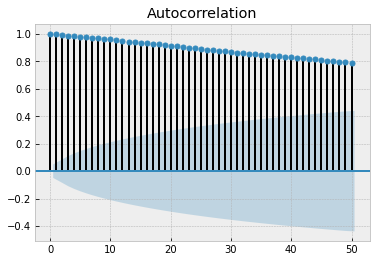

In [ ]:
acf = smt.graphics.plot_acf(btc.Adj_Close, lags=N_LAGS, alpha=Nivel)

## **Series de tiempo**

In [ ]:
print(btc)

           Date         High          Low  ...    Adj_Close        Day    Return
0    2016-01-01   436.246002   427.515015  ...   434.334015     Friday       NaN
1    2016-01-02   436.062012   431.869995  ...   433.437988   Saturday -0.002063
2    2016-01-03   433.743011   424.705994  ...   430.010986     Sunday -0.007907
3    2016-01-04   434.516998   429.084015  ...   433.091003     Monday  0.007163
4    2016-01-05   434.182007   429.675995  ...   431.959991    Tuesday -0.002611
...         ...          ...          ...  ...          ...        ...       ...
1579 2020-04-27  7814.527344  7730.806641  ...  7807.058594     Monday  0.001470
1580 2020-04-28  8871.753906  7786.049316  ...  8801.038086    Tuesday  0.127318
1581 2020-04-29  9440.650391  8533.255859  ...  8658.553711  Wednesday -0.016189
1582 2020-04-30  9048.023438  8667.763672  ...  8864.766602   Thursday  0.023816
1583 2020-05-01  9007.187500  8811.366211  ...  8988.596680     Friday  0.013969

[1584 rows x 9 columns]


In [ ]:
import seaborn as sns
from fbprophet import Prophet
import pandas.util.testing as tm

In [ ]:
btc.rename(columns={'Date': 'ds', 'Adj_Close': 'y'}, inplace=True)

In [ ]:
print(btc)

             ds         High          Low  ...            y        Day    Return
0    2016-01-01   436.246002   427.515015  ...   434.334015     Friday       NaN
1    2016-01-02   436.062012   431.869995  ...   433.437988   Saturday -0.002063
2    2016-01-03   433.743011   424.705994  ...   430.010986     Sunday -0.007907
3    2016-01-04   434.516998   429.084015  ...   433.091003     Monday  0.007163
4    2016-01-05   434.182007   429.675995  ...   431.959991    Tuesday -0.002611
...         ...          ...          ...  ...          ...        ...       ...
1579 2020-04-27  7814.527344  7730.806641  ...  7807.058594     Monday  0.001470
1580 2020-04-28  8871.753906  7786.049316  ...  8801.038086    Tuesday  0.127318
1581 2020-04-29  9440.650391  8533.255859  ...  8658.553711  Wednesday -0.016189
1582 2020-04-30  9048.023438  8667.763672  ...  8864.766602   Thursday  0.023816
1583 2020-05-01  9007.187500  8811.366211  ...  8988.596680     Friday  0.013969

[1584 rows x 9 columns]


In [ ]:
train_indices = btc.ds.apply(lambda x: x.year) < 2021
df_train = btc.loc[train_indices].dropna()
df_test = btc.loc[~train_indices].reset_index(drop=True)

In [ ]:
model_prophet = Prophet(seasonality_mode='additive')
model_prophet.add_seasonality(name='daily', period=30.5, fourier_order=5)
model_prophet.fit(df_train)


INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


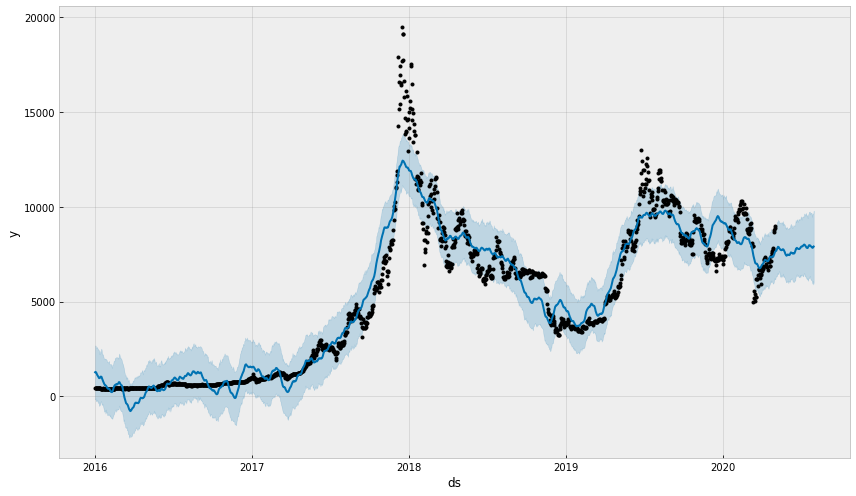

In [ ]:
df_future = model_prophet.make_future_dataframe(periods=90)
df_pred = model_prophet.predict(df_future)
grafico = model_prophet.plot(df_pred, figsize=(12, 7))

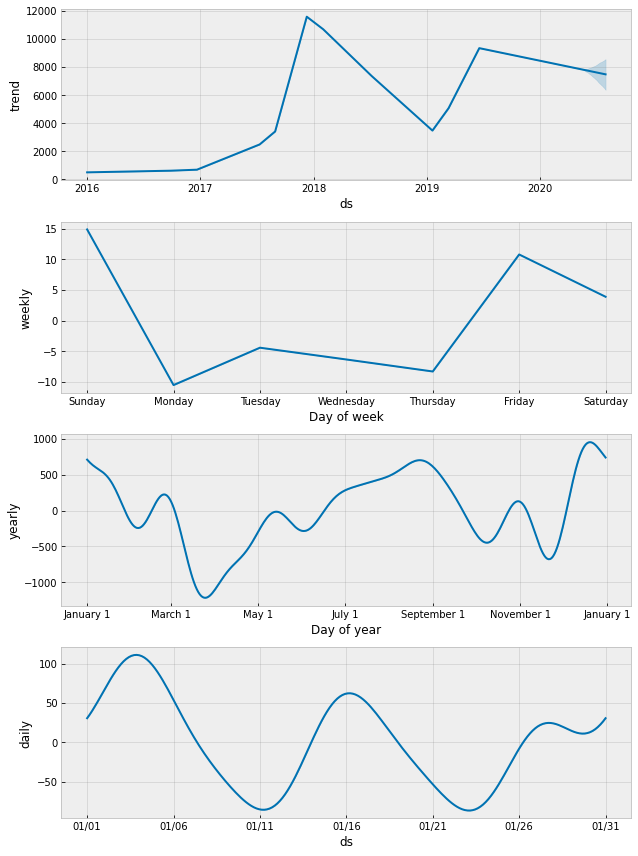

In [ ]:
graficos = model_prophet.plot_components(df_pred)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

### Prueba de Dickey-Fuller aumentado

In [ ]:
def adf_test(x):
    
    indices = ['Test Statistic', 'p-value',
               '# of Lags Used', '# of Observations Used']
    adf_test = adfuller(x, autolag='AIC')
    results = pd.Series(adf_test[0:4], index=indices)
    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value

    return results

In [ ]:
adf_test(btc.y)


Test Statistic              -1.962060
p-value                      0.303452
# of Lags Used              21.000000
# of Observations Used    1562.000000
Critical Value (1%)         -3.434543
Critical Value (5%)         -2.863392
Critical Value (10%)        -2.567756
dtype: float64

La hipótesis nula de la prueba ADF establece que la serie temporal no es 
estacionaria. Con un valor p de 0.88 (o equivalente, el estadístico de prueba mayor que el valor crítico para el nivel de confianza seleccionado), no tenemos motivos para rechazar la hipótesis nula, lo que significa que podemos concluir que la serie no es estacionaria.

### Prueba Kwiatkowski-Phillips-Schmidt-Shin ( KPSS )

In [ ]:
def kpss_test(x, h0_type='c'):

    indices = ['Test Statistic', 'p-value', '# of Lags']
    kpss_test = kpss(x, regression=h0_type)
    results = pd.Series(kpss_test[0:3], index=indices)
    for key, value in kpss_test[3].items():
        results[f'Critical Value ({key})'] = value

    return results

In [ ]:
kpss_test(btc.y)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



Test Statistic            3.57911
p-value                   0.01000
# of Lags                24.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64

La hipótesis nula de la prueba KPSS es que la serie temporal es estacionaria. Con un valor p de 0.01 (o estadística de prueba mayor que el valor crítico seleccionado), tenemos razones para rechazar la hipótesis nula a favor de la alternativa, lo que significa que la serie no es estacionaria.

### Gráficos de la función de autocorrelación (parcial) ( PACF / ACF )

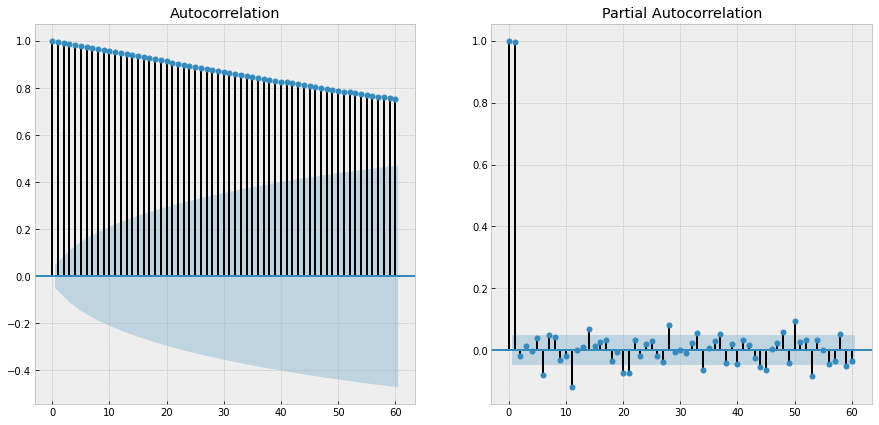

In [ ]:
N_LAGS = 60
SIGNIFICANCE_LEVEL = 0.05

fig, ax = plot.subplots(1, 2, figsize=(15, 7))

autocorrelation = plot_acf(btc.y, ax=ax[0], lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL)
partial = plot_pacf(btc.y, ax=ax[1], lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL)

### Modelos ARIMA

Los modelos ARIMA son una clase de modelos estadísticos que se utilizan para analizar y pronosticar datos de series temporales. Su objetivo es hacerlo describiendo las autocorrelaciones en los datos. ARIMA significa Autoregressive Integrated Moving Average y es una extensión de un modelo ARMA más simple. El objetivo del componente de integración adicional es garantizar la estacionariedad de la serie, porque, en contraste con los modelos de suavizado exponencial, la clase ARIMA requiere que las series temporales sean estacionarias

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as scs

In [ ]:
BTC = data.DataReader("BTC-USD", start='2016-01-01', end='2020-05-01', data_source='yahoo')

In [ ]:
df = BTC.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close

In [ ]:
df.head()

Date
2016-01-03    430.010986
2016-01-10    447.990997
2016-01-17    382.299011
2016-01-24    402.971008
2016-01-31    368.766998
Freq: W-SUN, Name: adj_close, dtype: float64

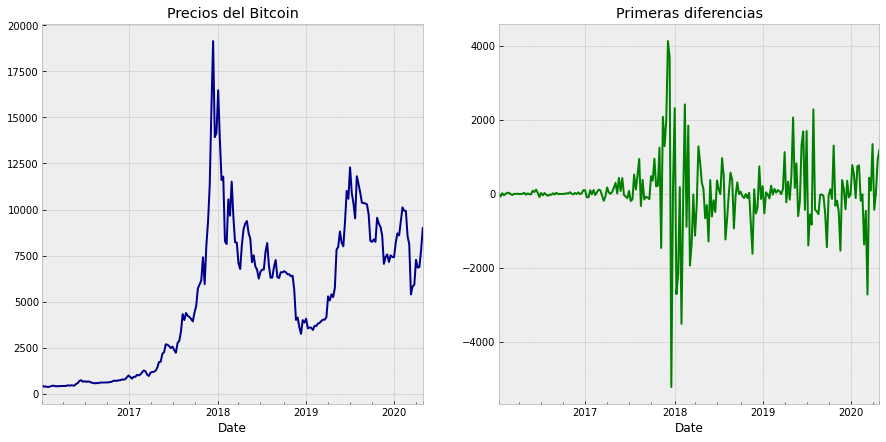

In [ ]:
df_diff = df.diff().dropna()

plot.style.use('bmh')
fig, ax = plot.subplots(1,2, figsize=(15, 7), sharex=True)
df.plot(title = "Precios del Bitcoin", ax=ax[0], color=['darkblue'])
df_diff.plot(ax=ax[1], title='Primeras diferencias', color=['green'])

In [ ]:
arima = ARIMA(df, order=(2, 1, 1)).fit(disp=0)
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.adj_close   No. Observations:                  226
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1856.688
Method:                       css-mle   S.D. of innovations            894.637
Date:                Tue, 11 Aug 2020   AIC                           3723.376
Time:                        23:13:45   BIC                           3740.479
Sample:                    01-10-2016   HQIC                          3730.278
                         - 05-03-2020                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                37.4306     56.178      0.666      0.506     -72.676     147.537
ar.L1.D.adj_close    -0.4594      0.202     -2.275      0.024      -0.855      -0.064
ar.L2.D.adj_close    -0.1050      0.068     -1.550      0.123      -0.238       0.028
ma.L1.D.adj_close     0.4760      0.194      2.454      0.015       0.096       0.856
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1885           -2.1767j            3.0866           -0.3754
AR.2           -2.1885           +2.1767j            3.0866            0.3754
MA.1           -2.1007           +0.0000j            2.1007            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
def arima_diagnostics(resids, n_lags=40):
     
    # create placeholder subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plot.subplots(2, 2, figsize=(15, 9))

    r = resids
    resids = (r - np.nanmean(r)) / np.nanstd(r)
    resids_nonmissing = resids[~(np.isnan(resids))]
    
    # residuals over time
    sns.lineplot(x=np.arange(len(resids)), y=resids, ax=ax1)
    ax1.set_title('Standardized residuals')

    # distribution of residuals
    x_lim = (-1.96 * 2, 1.96 * 2)
    r_range = np.linspace(x_lim[0], x_lim[1])
    norm_pdf = scs.norm.pdf(r_range)
    
    sns.distplot(resids_nonmissing, hist=True, kde=True, 
                 norm_hist=True, ax=ax2)
    ax2.plot(r_range, norm_pdf, 'g', lw=2, label='N(0,1)')
    ax2.set_title('Distribution of standardized residuals')
    ax2.set_xlim(x_lim)
    ax2.legend()
        
    # Q-Q plot
    qq = sm.qqplot(resids_nonmissing, line='s', ax=ax3)
    ax3.set_title('Q-Q plot')

    # ACF plot
    plot_acf(resids, ax=ax4, lags=n_lags, alpha=0.05)
    ax4.set_title('ACF plot')

    return fig

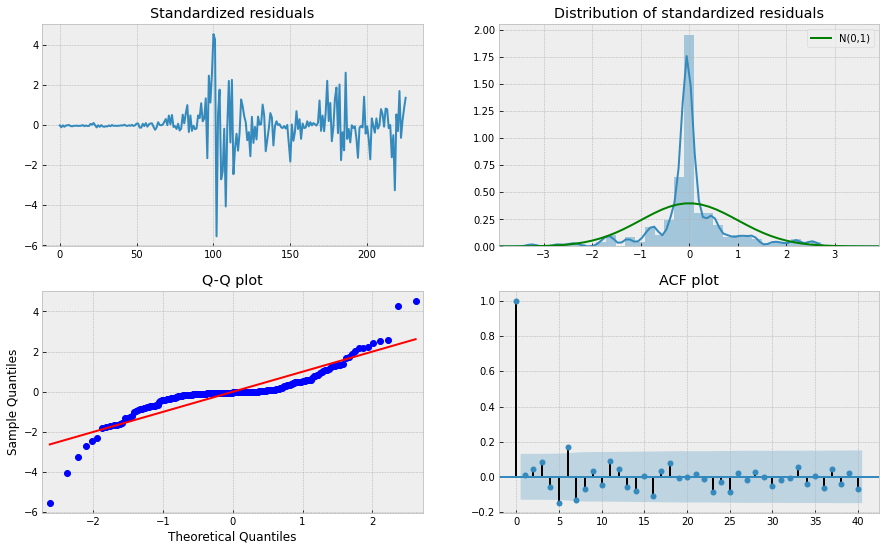

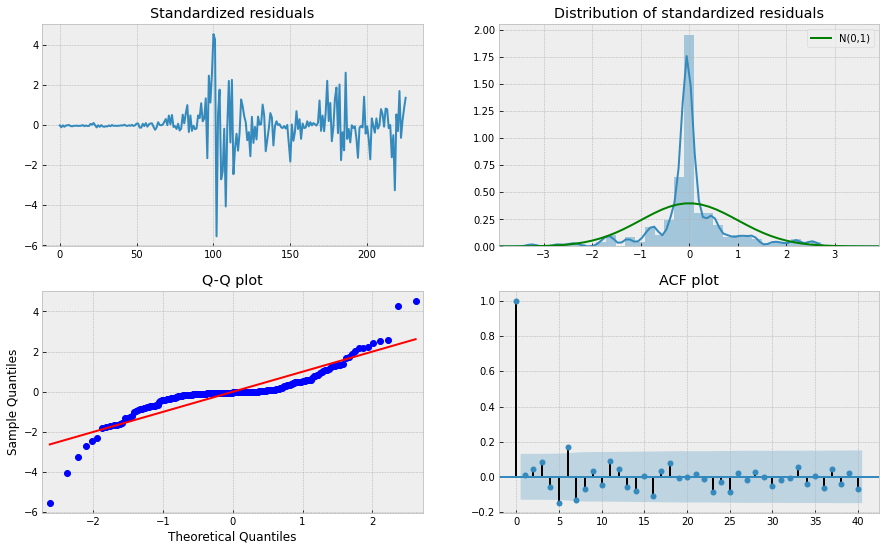

In [ ]:
arima_diagnostics(arima.resid, 40)

### Prueba de Ljung-Box

[Text(0, 0.5, 'p-value'),
 Text(0.5, 0, 'Lag'),
 Text(0.5, 1.0, 'Ljung-Box resultados del test')]

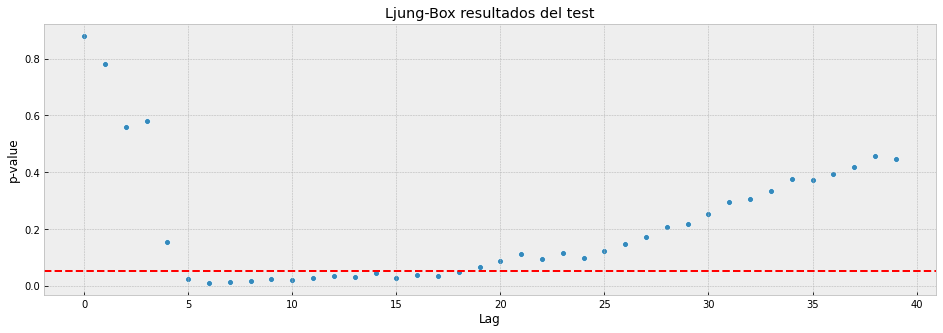

In [ ]:
ljung_box_results = acorr_ljungbox(arima.resid)

fig, ax = plot.subplots(1, figsize=[16, 5])
sns.scatterplot(x=range(len(ljung_box_results[1])), 
                y=ljung_box_results[1], 
                ax=ax)
ax.axhline(0.05, ls='--', c='r')
ax.set(title="Ljung-Box resultados del test",
       xlabel='Lag',
       ylabel='p-value')

### Modelos Multifactoriales


In [ ]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=387e0415fe9321cc5e8b3ff89f49ec3f1247fc1655eb6ad182f9b457a7c63440
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
import statsmodels.api as sm
import yfinance as yf

In [ ]:
RISKY_ASSET = 'BTC-USD'
MARKET_BENCHMARK = '^GSPC'
START_DATE = '2019-06-01'
END_DATE = '2020-04-12'

In [ ]:
df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True,
                 progress=False)

In [ ]:
df.shape

(317, 12)

In [ ]:
df.head()

Adj Close               ...       Volume              
                BTC-USD        ^GSPC  ...      BTC-USD         ^GSPC
Date                                  ...                           
2019-06-01  8564.016602          NaN  ...  22488303543           NaN
2019-06-02  8742.958008          NaN  ...  20266216022           NaN
2019-06-03  8208.995117  2744.449951  ...  22004511436  3.943810e+09
2019-06-04  7707.770996  2803.270020  ...  24609731548  3.810430e+09
2019-06-05  7824.231445  2826.149902  ...  21760923463  3.548830e+09

[5 rows x 12 columns]

In [ ]:
X = df['Adj Close'].rename(columns={RISKY_ASSET: 'asset', 
                                    MARKET_BENCHMARK: 'market'}) \
                   .resample('M') \
                   .last() \
                   .pct_change() \
                   .dropna()

In [ ]:
covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta = covariance / benchmark_variance
beta

1.1043558301197087

In [ ]:
y = X.pop('asset')
X = sm.add_constant(X)

capm_model = sm.OLS(y, X).fit()
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  asset   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1.659
Date:                Tue, 11 Aug 2020   Prob (F-statistic):              0.234
Time:                        23:15:42   Log-Likelihood:                 5.6609
No. Observations:                  10   AIC:                            -7.322
Df Residuals:                       8   BIC:                            -6.717
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0278      0.049     -0.572      0.5

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



In [ ]:
N_DAYS = 90

In [ ]:
df_rf = yf.download('^IRX', start=START_DATE, end=END_DATE)

[*********************100%***********************]  1 of 1 completed


In [ ]:
rf = df_rf.resample('M').last().Close / 100
rf

Date
2019-06-30    0.02035
2019-07-31    0.02030
2019-08-31    0.01933
2019-09-30    0.01770
2019-10-31    0.01498
2019-11-30    0.01565
2019-12-31    0.01505
2020-01-31    0.01510
2020-02-29    0.01230
2020-03-31    0.00030
2020-04-30    0.00210
Freq: M, Name: Close, dtype: float64

In [ ]:
rf = ( 1 / (1 - rf * N_DAYS / 360) )**(1 / N_DAYS)  
rf = (rf ** 30) - 1 

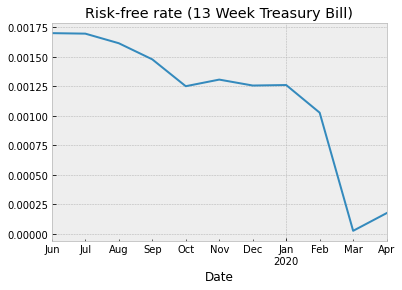

In [ ]:
rf.plot(title='Risk-free rate (13 Week Treasury Bill)')

In [ ]:
import pandas_datareader.data as web

In [ ]:
rf = web.DataReader('TB3MS', 'fred', start=START_DATE, 
                     end=END_DATE)

In [ ]:
rf = (1 + (rf / 100)) ** (1 / 12) - 1

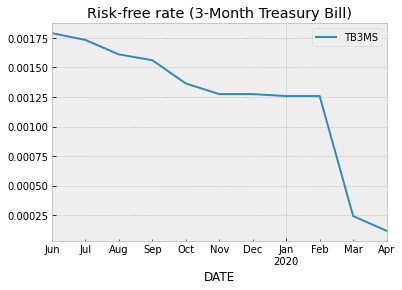

In [ ]:
rf.plot(title='Risk-free rate (3-Month Treasury Bill)')

## **Simulaciones de Monte Carlo**


In [ ]:
df = yf.download(RISKY_ASSET, start=START_DATE, end=END_DATE, adjusted=True)

In [ ]:
df.head()

In [ ]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()
print(f'Average return: {100 * returns.mean():.2f}%')
returns.plot(title=f'{RISKY_ASSET} retornos: {START_DATE} - {END_DATE}', figsize=[16, 5], color=['darkblue'])

In [ ]:
train = returns['2019-06-01':'2019-11-30']
test = returns['2019-12-01':'2020-04-12']

In [ ]:
T = len(test)
N = len(test)
S_0 = adj_close[train.index[-1].date()]
N_SIM = 100
mu = train.mean()
sigma = train.std()

In [ ]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N):
    
    dt = T/N
    dW = np.random.normal(scale = np.sqrt(dt), 
                          size=(n_sims, N))
    W = np.cumsum(dW, axis=1)

    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))

    S_t = s_0 * np.exp((mu - 0.5 * sigma ** 2) * time_steps 
                       + sigma * W)
    S_t = np.insert(S_t, 0, s_0, axis=1)
    
    return S_t

In [ ]:
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)

In [ ]:
# prepare objects for plotting 
LAST_TRAIN_DATE = train.index[-1].date()
FIRST_TEST_DATE = test.index[0].date()
LAST_TEST_DATE = test.index[-1].date()
PLOT_TITLE = (f'{RISKY_ASSET} Simulacion '
              f'({FIRST_TEST_DATE}:{LAST_TEST_DATE})')

selected_indices = adj_close[LAST_TRAIN_DATE:LAST_TEST_DATE].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations), index=index)

# plotting
ax = gbm_simulations_df.plot(alpha=0.2, legend=False, figsize=[16, 8])
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), color='red')
line_2, = ax.plot(index, adj_close[LAST_TRAIN_DATE:LAST_TEST_DATE], color='blue')
ax.set_title(PLOT_TITLE, fontsize=16)
ax.legend((line_1, line_2), ('media', 'actual'))

Tenga en cuenta que esta visualización solo es factible para un número razonable de rutas de muestra. En casos de la vida real, queremos utilizar significativamente más rutas de muestra que 100, ya que generalmente, a mayor número de rutas de muestra, más precisos / confiables son los resultados.

## **Aprendizaje profundo**

In [ ]:
import yfinance as yf
import numpy as np
import tensorflow as tf
from tensorflow import keras

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import (Dataset, TensorDataset, DataLoader, Subset)

from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# data
TICKER = 'BTC-USD'
START_DATE = '2019-01-06'
END_DATE = '2020-04-12'
N_LAGS = 3

# neural network 
VALID_SIZE = 12
BATCH_SIZE = 5
N_EPOCHS = 200

In [ ]:
df = yf.download(TICKER, 
                 start=START_DATE, 
                 end=END_DATE,
                 progress=False)

df = df.resample("M").last()
prices = df['Adj Close'].values

In [ ]:
df.head()

In [ ]:
def create_input_data(series, n_lags=1):
    
    X, y = [], []
    for step in range(len(series) - n_lags):
        end_step = step + n_lags
        X.append(series[step:end_step])
        y.append(series[end_step])
    return np.array(X), np.array(y)

In [ ]:
X, y = create_input_data(prices, N_LAGS)

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().unsqueeze(dim=1)

In [ ]:
valid_ind = len(X) - VALID_SIZE

dataset = TensorDataset(X_tensor, y_tensor)

train_dataset = Subset(dataset, list(range(valid_ind)))
valid_dataset = Subset(dataset, list(range(valid_ind, len(X))))

train_loader = DataLoader(dataset=train_dataset,     
                          batch_size=BATCH_SIZE)
valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=BATCH_SIZE)

In [ ]:
next(iter(train_loader))[0]

In [ ]:
naive_pred = prices[len(prices) - VALID_SIZE - 1:-1]
y_valid = prices[len(prices) - VALID_SIZE:]

naive_mse = mean_squared_error(y_valid, naive_pred)
naive_rmse = np.sqrt(naive_mse)
print(f"Naive forecast – MSE: {naive_mse:.2f}, RMSE: {naive_rmse:.2f}")


In [ ]:
class MLP(nn.Module):
   
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_size, 8)
        self.linear2 = nn.Linear(8, 4)
        self.linear3 = nn.Linear(4, 1)
        self.dropout = nn.Dropout(p=0.2)
    
    
    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.linear3(x)
        return x

In [ ]:
# set seed for reproducibility
torch.manual_seed(42)

model = MLP(N_LAGS).to(device) 
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
model

In [ ]:
PRINT_EVERY = 50
train_losses, valid_losses = [], []

for epoch in range(N_EPOCHS):
    running_loss_train = 0
    running_loss_valid = 0

    model.train()
    
    for x_batch, y_batch in train_loader:
        
        optimizer.zero_grad()
        
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        y_hat = model(x_batch)
        loss = loss_fn(y_batch, y_hat)
        loss.backward()
        optimizer.step()
        running_loss_train += loss.item() * x_batch.size(0)
        
    
    epoch_loss_train = running_loss_train / len(train_loader.dataset)
    train_losses.append(epoch_loss_train)

    with torch.no_grad():
        
        model.eval()
        
        for x_val, y_val in valid_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            y_hat = model(x_val)
            loss = loss_fn(y_val, y_hat)
            running_loss_valid += loss.item() * x_val.size(0)
            
        
        epoch_loss_valid = running_loss_valid / len(valid_loader.dataset)
            
        if epoch > 0 and epoch_loss_valid < min(valid_losses):
            best_epoch = epoch
            torch.save(model.state_dict(), './mlp_checkpoint.pth')
            
        valid_losses.append(epoch_loss_valid)

    if epoch % PRINT_EVERY == 0:
        print(f"<{epoch}> – Train. loss: {epoch_loss_train:.2f} \t Valid. loss: {epoch_loss_valid:.2f}")
        
print(f'Lowest loss recorded in epoch: {best_epoch}')

In [ ]:
train_losses = np.array(train_losses)
valid_losses = np.array(valid_losses)

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(train_losses, color='darkblue', label='Training loss')
ax.plot(valid_losses, color='red', label='Validation loss')

ax.set(title="Loss over epochs", 
       xlabel='Epoch', 
       ylabel='Loss')

ax.legend()

In [ ]:
state_dict = torch.load('mlp_checkpoint.pth')
model.load_state_dict(state_dict)

In [ ]:
y_pred, y_valid= [], []

with torch.no_grad():

    model.eval()
    
    for x_val, y_val in valid_loader:
        x_val = x_val.to(device) 
        y_pred.append(model(x_val))
        y_valid.append(y_val)
        
y_pred = torch.cat(y_pred).numpy().flatten()
y_valid = torch.cat(y_valid).numpy().flatten()

In [ ]:
mlp_mse = mean_squared_error(y_valid, y_pred)
mlp_rmse = np.sqrt(mlp_mse)
print(f"MLP's forecast – MSE: {mlp_mse:.2f}, RMSE: {mlp_rmse:.2f}")

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(y_valid, color='darkblue', label='true')
ax.plot(y_pred, color='red', label='prediction')

ax.set(title="Multilayer Perceptron's Forecasts", 
       xlabel='Time', 
       ylabel='Price ($)')

ax.legend()